#                    --------Customer Segmentation for Automobile Market Expansion-----------

# Project Description 

An automobile company is planning to expand into new markets with its existing product portfolio (P1, P2, P3, P4, and P5). 
Based on intensive market research, the company has determined that customer behavior in the new market closely mirrors that of its current market.
In the existing market, the sales team successfully classified customers into four distinct segments (A, B, C, D) and tailored outreach strategies for each segment.

This segmentation based communication approach proved highly effective, driving customer engagement and product adoption.
For the new market, the company has identified 2,627 potential customers and intends to replicate the same segmentation strategy.
By applying data driven customer classification, the goal is to group these new customers into meaningful segments and design targeted marketing campaigns that align with their preferences and behaviors.

# Project Objective

Our objective was to identify the most reliable machine learning model to classify new customers into the correct group, ensuring accurate segmentation for business decision‑making.
To train and test a customer segmentation/classification model using existing market data, 
and then apply it to predict the correct group (A, B, C, or D) for the 2,627 new customers in the new market.



In [1]:
# Customer Segmentation Using Bagging & Boosting

### 1. Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Loading and Dataprocessing - Training dataset

In [3]:
# Import the Data and view info

df = pd.read_csv("Train.csv")

# Taking backup of the dataset
df_raw = df.copy()

# Rename Var_1 to Category
df.rename(columns={'Var_1': 'Category'}, inplace=True)

df.head()



,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


### EDA - Exploratory Data Analysis

In [4]:
# getting the non-null & data type info details

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Category         7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [5]:
# Describing the key statistics for the numeric columns 

df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [6]:
# Unique values in each column

print("*** Unique values in each column- Training data ***\n")
for col in ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Category', 'Segmentation']:
    print(f"{col:15} :", df[col].nunique(), "unique values")
    print("-" * 50)
    print(f"Values: {df[col].unique()}")
    print("\n")

*** Unique values in each column- Training data ***

Gender          : 2 unique values
--------------------------------------------------
Values: ['Male' 'Female']


Ever_Married    : 2 unique values
--------------------------------------------------
Values: ['No' 'Yes' nan]


Graduated       : 2 unique values
--------------------------------------------------
Values: ['No' 'Yes' nan]


Profession      : 9 unique values
--------------------------------------------------
Values: ['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]


Spending_Score  : 3 unique values
--------------------------------------------------
Values: ['Low' 'Average' 'High']


Category        : 7 unique values
--------------------------------------------------
Values: ['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' nan 'Cat_5']


Segmentation    : 4 unique values
--------------------------------------------------
Values: ['D' 'A' 'B' 'C']




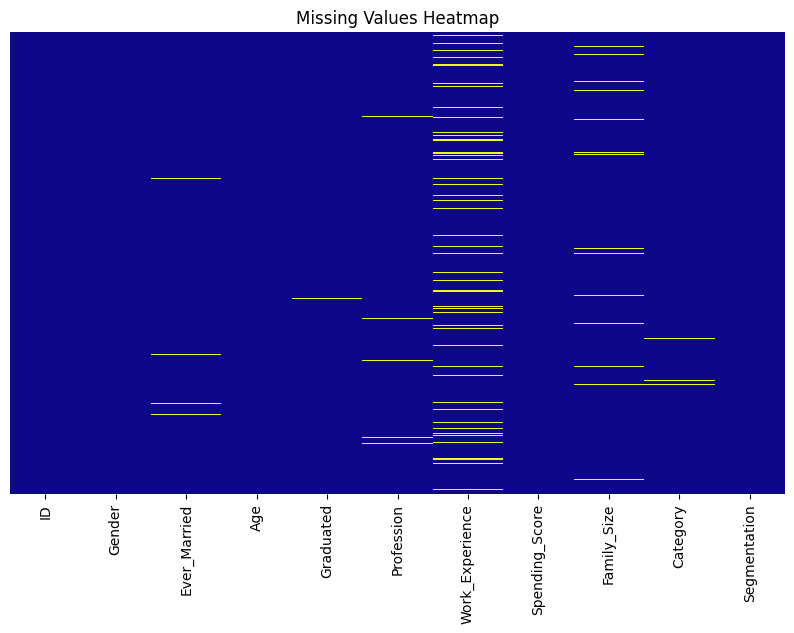

In [7]:
# Visualization of Null values in the columns

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='plasma')
plt.title('Missing Values Heatmap')
plt.show()

In [8]:
# Dropping off 'ID' column , as it is not necessary

df = df.drop('ID', axis= 1)

In [9]:
# Count Null Values
df.isna().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Category            76
Segmentation         0
dtype: int64

In [10]:
# Deal with null values with low frequencies which cannot be recovered

# Count rows before dropping

before = df.shape[0]
print("Number of rows before dropping:\n",before)

Number of rows before dropping:
 8068


In [11]:
# dropping of rows with null values in the below specific columns

df.dropna(subset=['Ever_Married', 'Graduated', 'Category', 'Profession'], inplace=True)

print("----Checking Null values----\n ")
df.isna().sum()

----Checking Null values----
 


Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience    764
Spending_Score       0
Family_Size        293
Category             0
Segmentation         0
dtype: int64

In [12]:
# Count rows after dropping

after = df.shape[0]

print("Number of rows after dropping:\n",after)

Number of rows after dropping:
 7669


In [13]:
# total number of rows were dropped

dropped = before - after
print(f"Rows before: {before}\n")
print(f"Rows after : {after}\n")
print(f"Rows dropped: {dropped}\n")

Rows before: 8068

Rows after : 7669

Rows dropped: 399



In [14]:
# Try to find a relation to recover missing data

print(df['Family_Size'].value_counts())
print('-'*50)
print(df['Work_Experience'].value_counts())

Family_Size
2.0    2294
3.0    1427
1.0    1379
4.0    1320
5.0     573
6.0     203
7.0      91
8.0      47
9.0      42
Name: count, dtype: int64
--------------------------------------------------
Work_Experience
1.0     2255
0.0     2211
9.0      457
8.0      424
2.0      271
3.0      245
4.0      241
6.0      191
7.0      190
5.0      185
10.0      52
11.0      48
12.0      46
13.0      45
14.0      44
Name: count, dtype: int64


In [15]:
# use median to fill missing values to avoid bias from outliers as the values are spread out

df.fillna(
    {'Work_Experience': df['Work_Experience'].median(),
     'Family_Size': df['Family_Size'].median()},
    inplace=True
)

print("----Checking Null values----\n ")
df.isna().sum()

----Checking Null values----
 


Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Category           0
Segmentation       0
dtype: int64

### Importing and Data processing - Test Dataset

In [4]:
# Import the Data and view info

df_test = pd.read_csv("Test.csv")

# Taking backup of the dataset
df_test_raw = df.copy()

# Rename Var_1 to Category
df_test.rename(columns={'Var_1': 'Category'}, inplace=True)

df_test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [17]:
# Unique values in each column

print("*** Unique values in each column- Test data ***\n")
for col in ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Category', 'Segmentation']:
    print(f"{col:15} :", df_test[col].nunique(), "unique values")
    print("-" * 50)
    print(f"Values: {df_test[col].unique()}")
    print("\n")

*** Unique values in each column- Test data ***

Gender          : 2 unique values
--------------------------------------------------
Values: ['Female' 'Male']


Ever_Married    : 2 unique values
--------------------------------------------------
Values: ['Yes' 'No' nan]


Graduated       : 2 unique values
--------------------------------------------------
Values: ['Yes' 'No' nan]


Profession      : 9 unique values
--------------------------------------------------
Values: ['Engineer' 'Healthcare' nan 'Executive' 'Marketing' 'Doctor' 'Artist'
 'Lawyer' 'Entertainment' 'Homemaker']


Spending_Score  : 3 unique values
--------------------------------------------------
Values: ['Low' 'Average' 'High']


Category        : 7 unique values
--------------------------------------------------
Values: ['Cat_6' 'Cat_4' 'Cat_3' nan 'Cat_1' 'Cat_2' 'Cat_5' 'Cat_7']


Segmentation    : 4 unique values
--------------------------------------------------
Values: ['B' 'A' 'C' 'D']




In [18]:
# Dropping off 'ID' column - Test dataset , as it is not necessary

df_test = df_test.drop('ID', axis= 1)

In [19]:

# Count Null Values - Test Dataset

na_test= df_test.isna().sum()

print(na_test)

Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Category            32
Segmentation         0
dtype: int64


In [20]:
# Count rows before dropping - Test Dataset

before_test = df_test.shape[0]
print("Test dataset_Number of rows before dropping:\n",before_test)

Test dataset_Number of rows before dropping:
 2627


In [21]:
# dropping of rows with null values in the below specific columns - Test Dataset

df_test.dropna(subset=['Ever_Married', 'Graduated', 'Category', 'Profession'], inplace=True)
df_test.isna().sum()

Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience    249
Spending_Score       0
Family_Size        104
Category             0
Segmentation         0
dtype: int64

In [22]:
# Count rows after dropping - Test Dataset
after_test = df_test.shape[0]
print("Test dataset_Number of rows before dropping:",after_test)


# total number of rows were dropped
dropped_test = before - after
print(f"\nRows before: {before_test}\n")
print(f"Rows after : {after_test}\n")
print(f"Rows dropped: {dropped_test}\n")

Test dataset_Number of rows before dropping: 2488

Rows before: 2627

Rows after : 2488

Rows dropped: 399



In [23]:

# Try to find a relation to recover missing data
print(df_test['Family_Size'].value_counts())
print('-'*50)
print(df_test['Work_Experience'].value_counts())


Family_Size
2.0    728
1.0    484
3.0    432
4.0    423
5.0    185
6.0     77
7.0     25
9.0     16
8.0     14
Name: count, dtype: int64
--------------------------------------------------
Work_Experience
0.0     736
1.0     732
8.0     141
9.0     131
4.0      90
2.0      81
3.0      77
5.0      70
7.0      57
6.0      56
14.0     21
11.0     14
12.0     12
10.0     11
13.0     10
Name: count, dtype: int64


In [24]:

# use median to fill missing values to avoid bias from outliers as the values are spread out

df_test.fillna(
    {'Work_Experience': df_test['Work_Experience'].median(),
     'Family_Size': df_test['Family_Size'].median()},
    inplace=True
)

print("----Test Dataset_Checking Null values----\n ",df_test.isna().sum())

----Test Dataset_Checking Null values----
  Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Category           0
Segmentation       0
dtype: int64


## VISUALISATION - Pair plot,Heat Map

### Pair Plot - without hue -segmentation

In [25]:
# to list columns in the dataset

for col in df.columns:
    print(col)



Gender
Ever_Married
Age
Graduated
Profession
Work_Experience
Spending_Score
Family_Size
Category
Segmentation


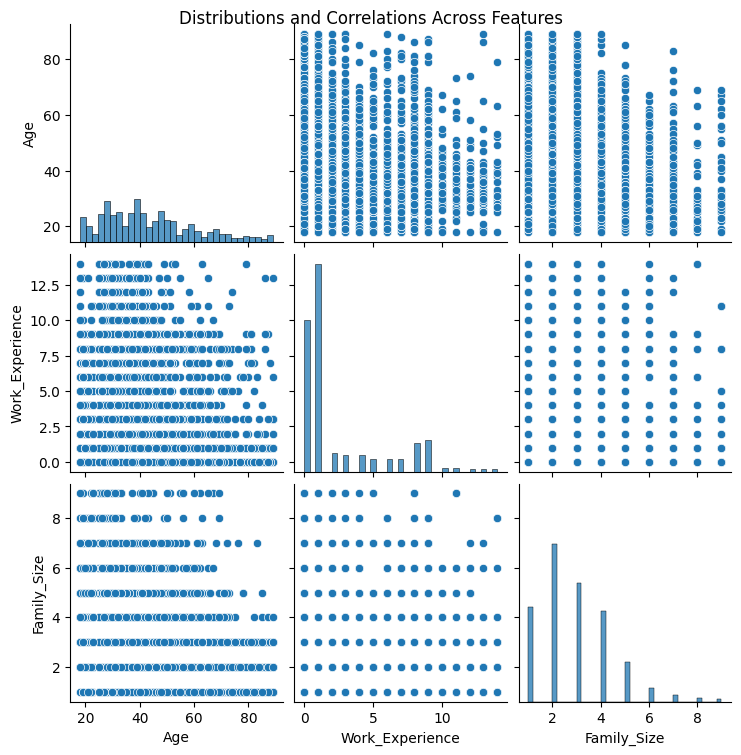

In [26]:
# Pair Plot - summary of relationships and distributions across multiple features at once.

sns.pairplot(data= df)
plt.suptitle("Distributions and Correlations Across Features", y=1.0)  # y adjusts title position
plt.show()

### Pair plot with hue on feature 'segmentation'

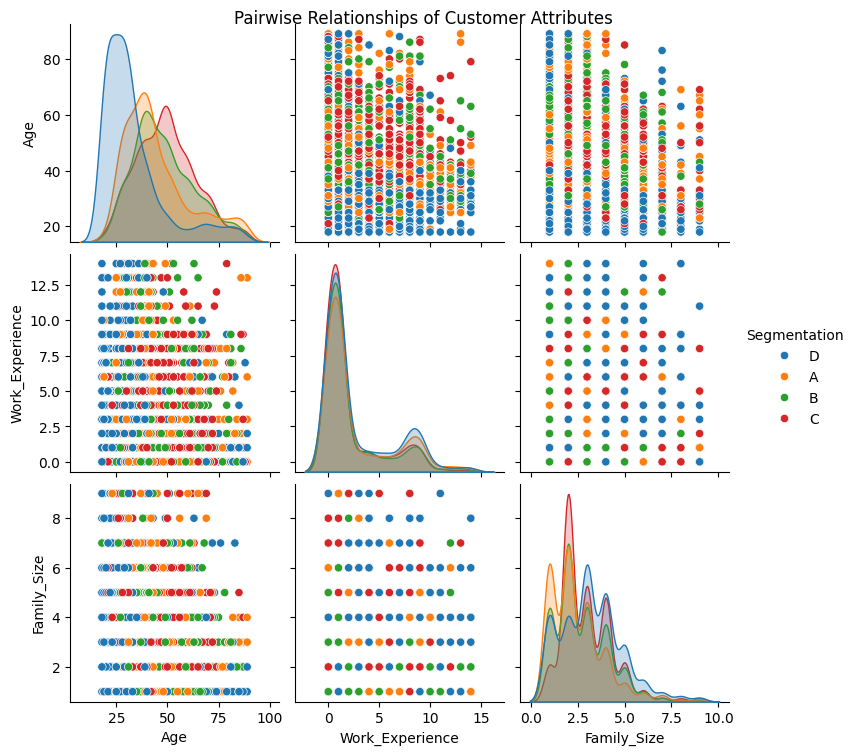

In [27]:

# Pair Plot – Customer Relationships Across Features

sns.pairplot(df, hue='Segmentation')
plt.suptitle("Pairwise Relationships of Customer Attributes", y=1.0)  # y adjusts title position
plt.show()

### Correlation Matrix (HEAT MAP) - correlation of numberic features

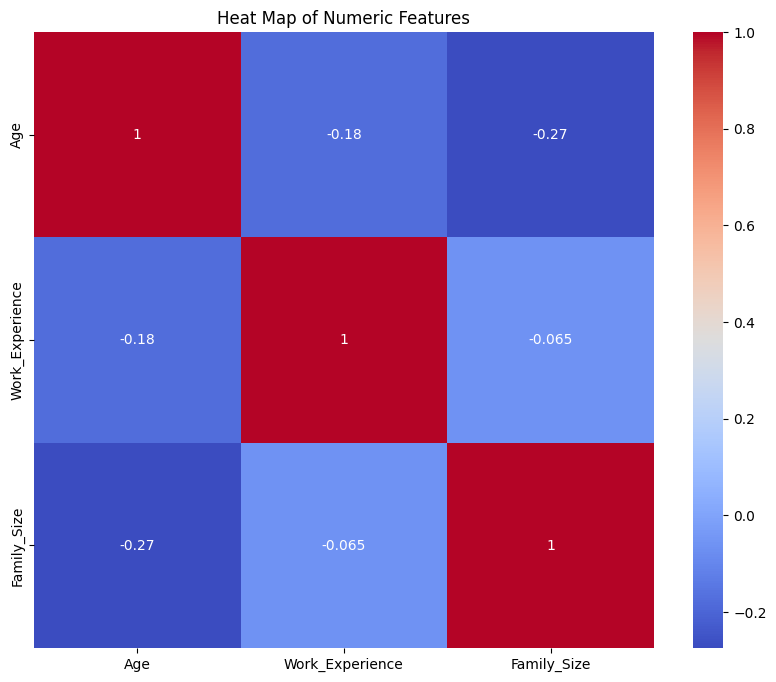

In [28]:
# Correlation Matrix (HEAT MAP) - Select only numeric columns for correlation

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(data=df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Heat Map of Numeric Features')
plt.show()

### BOX PLOT - Spending Score vs Family Size (by Gender)

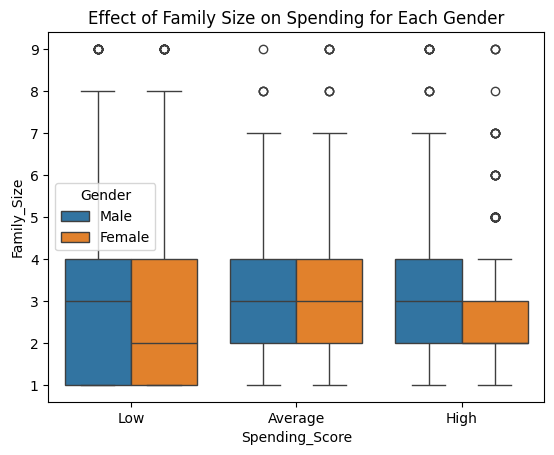

In [29]:
# BOX PLOT - Effect of Family size on Spending for each gender

sns.boxplot(data=df, x='Spending_Score', y='Family_Size', hue='Gender')
plt.title('Effect of Family Size on Spending for Each Gender')
plt.show()

### visualization dashboard - feature‑wise

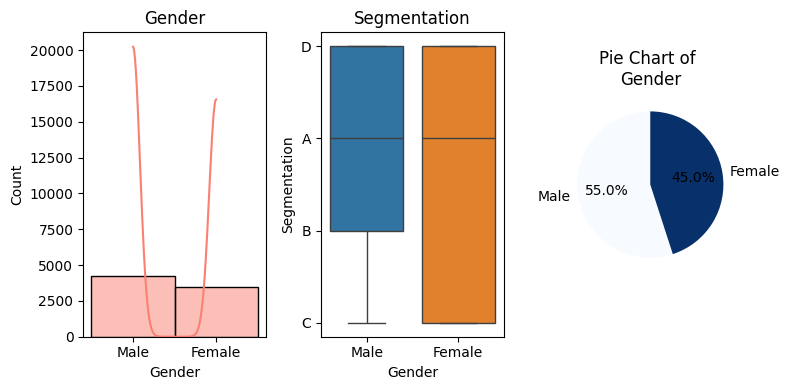

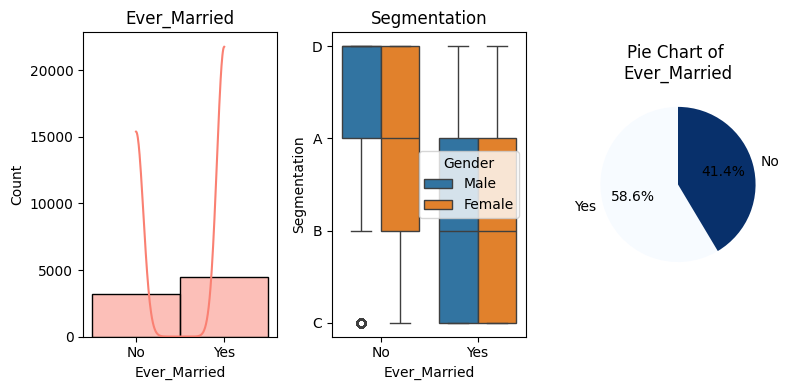

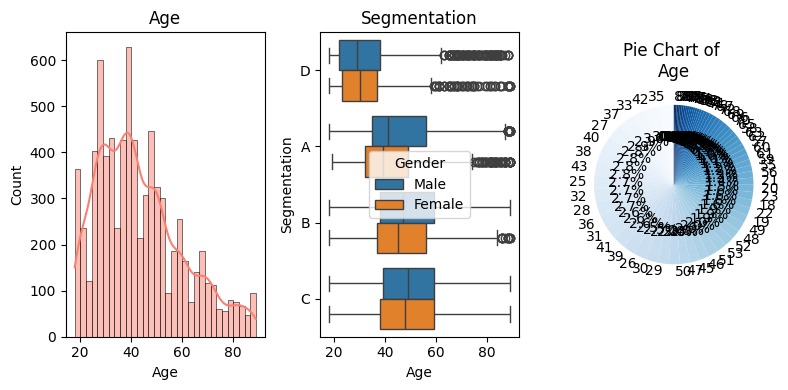

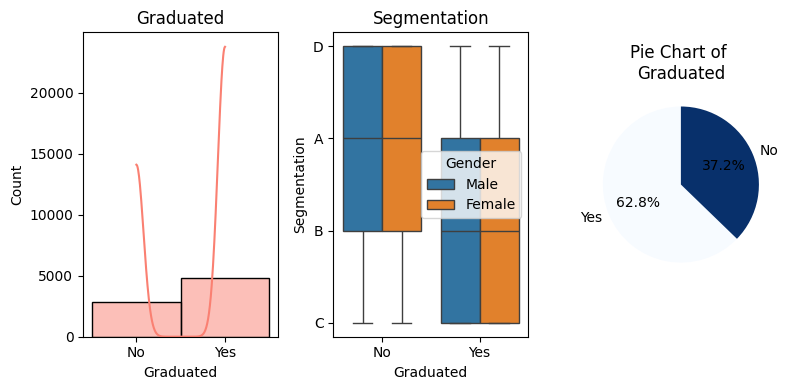

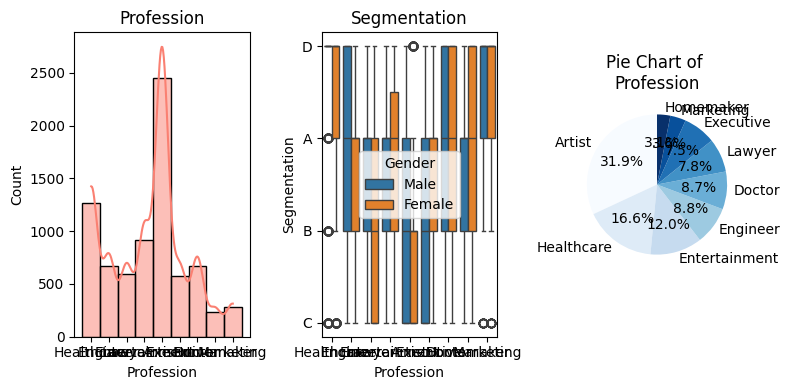

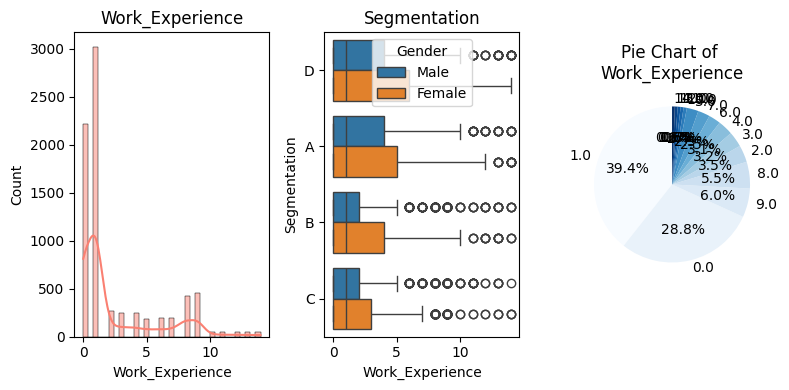

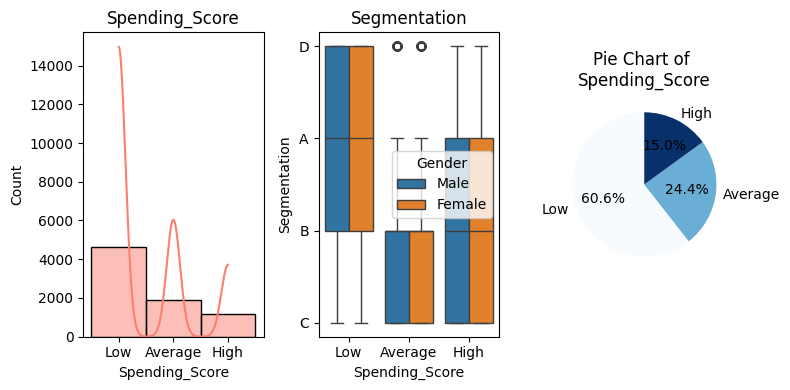

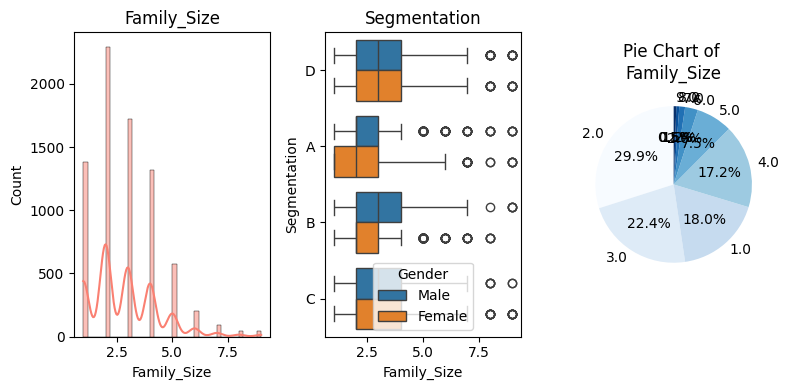

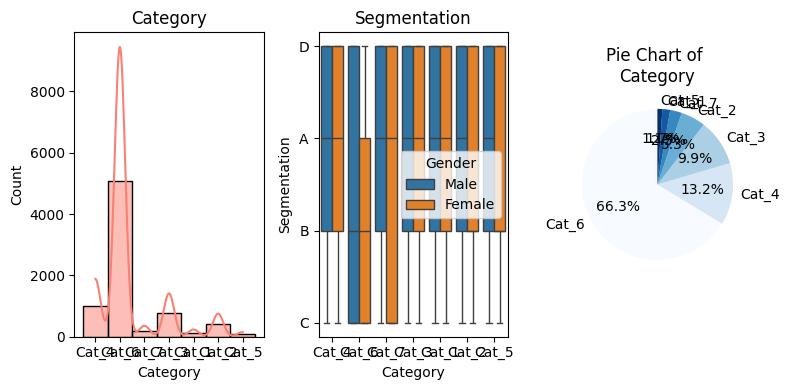

In [30]:

# ----feature‑wise visualization dashboard----
# Visualisation automation: The visualization for every column except for Segmentation column
# Histogram - Feature distribution - feature is skewed, has outliers, or is balanced.
# #Boxplot - Feature relation against segmentation feature
# Pie chart -quick sense of categorical distribution


for col in df.columns:              # Loop through all columns in the DataFrame
    if col != 'Segmentation':       # Skip the 'Segmentation' column itself
        plt.figure(figsize=(8, 4))  # Create a new figure for each column, size 8x4

                # 1️. Histogram (Distribution of the column)
        plt.subplot(1, 3, 1)        # First subplot in a 1-row, 3-column layout
        sns.histplot(data=df[col], color='salmon', kde=True)
        plt.title(col)              # Title = column name

        # 2. Boxplot (Relation with Segmentation, grouped by Gender)
        plt.subplot(1, 3, 2)        # Second subplot
        sns.boxplot(data=df, x=col, y='Segmentation', hue='Gender')
        plt.title('Segmentation')

        # 3️. Pie chart (Proportion of values in the column)
        plt.subplot(1, 3, 3)        # Third subplot
        df[col].value_counts().plot.pie(
            autopct='%1.1f%%',      # Show percentages with 1 decimal
            startangle=90,          # Rotate start angle for better look
            cmap='Blues'            # Color map
        )
        plt.title(f'Pie Chart of \n{col}')
        plt.ylabel('')              # Remove y-label for cleaner look

        plt.tight_layout()          # Adjust spacing so plots don’t overlap
        plt.show()                  # Display the figure

### 3. Machine Learning Kick starts here ...

### Data preprocessing - Label encoder -Transforming categorical to numerical

In [31]:
from sklearn.preprocessing import LabelEncoder

# Creating an empty dictionary to store LabelEncoder objects for each categorical column so that it allows us to reuse the same encoders later

le = dict()  # store encoders per column

lbld_train_data = df.copy() # shallow copy to avoid override of original dataset

cat_cols = df.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each categorical column
for col in cat_cols:
    le[col] = LabelEncoder()
    lbld_train_data[col] = le[col].fit_transform(df[col])

lbld_train_data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category,Segmentation
0,1,0,22,0,5,1.0,2,4.0,3,3
1,0,1,38,1,2,1.0,0,3.0,3,0
2,0,1,67,1,2,1.0,2,1.0,5,1
3,1,1,67,1,7,0.0,1,2.0,5,1
4,0,1,40,1,3,1.0,1,6.0,5,0


### Feature Selection - Numeric and Categorical

In [32]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings

# Disable sklearn warnings
warnings.filterwarnings('ignore')

### Numerical Features selection - with ANOVA F-Test

In [33]:
from sklearn.feature_selection import f_classif    #imports ANOVA F-Test for numeric feature selection

x = lbld_train_data[numeric_columns]    # numeric features

y = lbld_train_data['Segmentation']     # target variable

In [34]:
# # to understand the dataset split 

x_train, x_cv, y_train, y_cv = train_test_split(x, y, test_size= 0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_cv.shape)
print(y_cv.shape)

(6135, 3)
(6135,)
(1534, 3)
(1534,)


In [35]:
# # Run ANOVA F-test to Obtain Scores for feature selection

f_value, p_value = f_classif(x, y)

# Threshold
alpha = 0.05

# Lists to collect results
relevant_features = []
irrelevant_features = []

# Loop through features
for i in range(len(f_value)):
    feature = numeric_columns[i]
    f_val = f_value[i]
    p_val = p_value[i]

    if p_val < alpha:
        relevant_features.append((feature, f_val, p_val))
    else:
        irrelevant_features.append((feature, f_val, p_val))

# Print consolidated results
print("---- Relevant Features (strong relation with target): ----")
if relevant_features:
    for feat, fval, pval in relevant_features:
        print(f"- {feat}: F-value = {fval:.3f}, P-value = {pval:.3e}")
else:
    print("0")

print("\n---- Irrelevant Features (not statistically suitable): ----")
if irrelevant_features:
    for feat, fval, pval in irrelevant_features:
        print(f"- {feat}: F-value = {fval:.3f}, P-value = {pval:.3e}")
else:
    print("0")

# Final conclusion
if not irrelevant_features:
    print("\n Final conclusion — all features are statistically significant.\n")
else:
    print("\n Final conclusion — some features are not statistically significant and may be excluded.\n")



---- Relevant Features (strong relation with target): ----
- Age: F-value = 463.642, P-value = 7.677e-277
- Work_Experience: F-value = 19.016, P-value = 2.781e-12
- Family_Size: F-value = 99.384, P-value = 4.139e-63

---- Irrelevant Features (not statistically suitable): ----
0

 Final conclusion — all features are statistically significant.



### Categorical Features - with Chi-square test.

In [36]:
from sklearn.feature_selection import chi2

In [37]:
# Prepare data
x = lbld_train_data[cat_cols].drop('Segmentation', axis=1)
y = lbld_train_data['Segmentation']


# 🔍 Debug checks (add here)
print("Categorical columns:", cat_cols)
print("Shape of x:", x.shape)
print("Unique values in Gender:", x['Gender'].unique())
print("Unique values in Ever_Married:", x['Ever_Married'].unique())


# Run Chi-square test
score, p_value = chi2(x, y)

# Threshold
alpha = 0.05

# Lists to collect results
relevant_features = []
irrelevant_features = []

# Loop through categorical features
for i in range(len(score)):
    feature = cat_cols[i]
    chi_val = score[i]
    p_val = p_value[i]
    
    if p_val < alpha:
        relevant_features.append((feature, chi_val, p_val))
    else:
        irrelevant_features.append((feature, chi_val, p_val))

# Print consolidated results

print("---- Relevant Categorical Features (strong relation with target): ----\n")
if relevant_features:
    for feat, chi_val, pval in relevant_features:
        print(f"- {feat}: Chi2 = {chi_val:.3f}, P-value = {pval:.3e}")
else:
    print("0")

print("\n---- Irrelevant Categorical Features (not statistically suitable): ----\n")
if irrelevant_features:
    for feat, chi_val, pval in irrelevant_features:
        print(f"- {feat}: Chi2 = {chi_val:.3f}, P-value = {pval:.3e}")
else:
    print("0")

# Final conclusion
if not irrelevant_features:
    print("\n Final conclusion — all categorical features are statistically significant.\n")
else:
    print("\n Final conclusion — some categorical features are not statistically significant and may be excluded if required.\n")


Categorical columns: Index(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Category', 'Segmentation'],
      dtype='object')
Shape of x: (7669, 6)
Unique values in Gender: [1 0]
Unique values in Ever_Married: [0 1]
---- Relevant Categorical Features (strong relation with target): ----

- Ever_Married: Chi2 = 577.968, P-value = 6.018e-125
- Graduated: Chi2 = 380.480, P-value = 3.742e-82
- Profession: Chi2 = 2384.941, P-value = 0.000e+00
- Spending_Score: Chi2 = 755.633, P-value = 1.811e-163
- Category: Chi2 = 51.025, P-value = 4.833e-11

---- Irrelevant Categorical Features (not statistically suitable): ----

- Gender: Chi2 = 5.452, P-value = 1.415e-01

 Final conclusion — some categorical features are not statistically significant and may be excluded if required.



## 4. Building Models

### Scaling & Splitting

In [38]:
# Splitting the Data

x = lbld_train_data.drop('Segmentation', axis= 1)
y = lbld_train_data['Segmentation']

In [39]:
x_train, x_cv, y_train, y_cv = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_cv shape: {x_cv.shape}")
print(f"y_cv shape: {y_cv.shape}")

x_train shape: (6135, 9)
y_train shape: (6135,)
x_cv shape: (1534, 9)
y_cv shape: (1534,)


In [40]:
#Scaling Numeric Features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train[numeric_columns] = scaler.fit_transform(x_train[numeric_columns])
x_cv[numeric_columns] = scaler.transform(x_cv[numeric_columns])

## I. Single Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
# Training the model

dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [43]:
# Testing on the training set

train_pred = dtree.predict(x_train)
print("Training predit output:\n",train_pred)


Training predit output:
 [2 3 2 ... 0 3 3]


In [44]:
# Evaluating performance

print("\n Classification Report :\n",classification_report(y_train, train_pred))


 Classification Report :
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      1489
           1       0.94      0.95      0.94      1407
           2       0.96      0.93      0.95      1534
           3       1.00      0.96      0.98      1705

    accuracy                           0.96      6135
   macro avg       0.96      0.96      0.96      6135
weighted avg       0.96      0.96      0.96      6135



### Evaluating the model on the Cross-Validation Set

In [45]:
# Evaluating the model on the Cross-Validation Set

cv_pred = dtree.predict(x_cv)
print("\n-- CV predict:Decision Tree --\n ",cv_pred)


-- CV predict:Decision Tree --
  [3 1 0 ... 0 3 3]


In [46]:
#CV (validation) report

print("\n CV Validation Report of testdata :\n",classification_report(y_cv, cv_pred))


 CV Validation Report of testdata :
               precision    recall  f1-score   support

           0       0.38      0.36      0.37       378
           1       0.33      0.32      0.33       372
           2       0.46      0.50      0.48       362
           3       0.60      0.59      0.59       422

    accuracy                           0.45      1534
   macro avg       0.44      0.44      0.44      1534
weighted avg       0.45      0.45      0.45      1534



In [47]:
#Confusion Matrix -comparing true labels vs predicted labels.

cm = confusion_matrix(y_cv, cv_pred)
print("\n confusion matrix - Decision Tree on CV Set :\n",cm)




 confusion matrix - Decision Tree on CV Set :
 [[136  88  67  87]
 [ 90 120 110  52]
 [ 51  99 182  30]
 [ 78  58  37 249]]


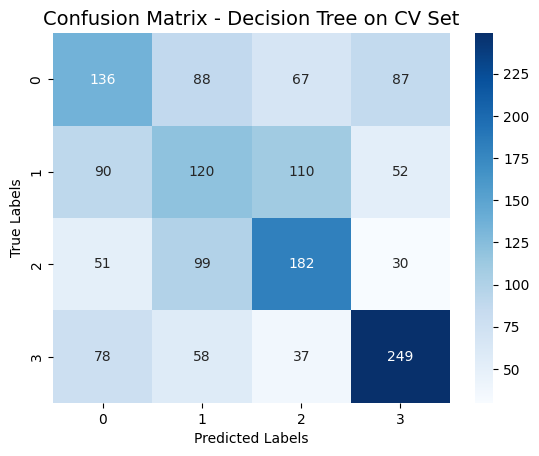

In [48]:
# Heat Map - Correlation Matrix

sns.heatmap(cm, annot= True, fmt= 'd', cmap='Blues')
plt.title("Confusion Matrix - Decision Tree on CV Set", fontsize=14)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.show()

## II. Bagging - ML technique to reduce variance, prevent overfitting


### Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
# Training the model

rf_clf = RandomForestClassifier(n_estimators= 5)
rf_clf.fit(x_train, y_train)

,n_estimators,5
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [51]:
# Testing on the training set

train_pred = rf_clf.predict(x_train)
print("Training predit output:\n",train_pred)


Training predit output:
 [2 3 2 ... 0 3 3]


In [52]:
# Evaluating performance

print("\n Classification Report :\n", classification_report(y_train, train_pred))


 Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      1489
           1       0.87      0.87      0.87      1407
           2       0.91      0.89      0.90      1534
           3       0.94      0.93      0.94      1705

    accuracy                           0.90      6135
   macro avg       0.90      0.90      0.90      6135
weighted avg       0.90      0.90      0.90      6135



### Evaluating the Randon forest model on the Cross-Validation Set

In [53]:
# Evaluating the model on the Cross-Validation Set

cv_pred = rf_clf.predict(x_cv)

print("\n-- CV predict:Random forest -- \n",cv_pred)


-- CV predict:Random forest -- 
 [3 3 0 ... 1 3 3]


In [54]:
#CV (validation) report

print("\n CV Validation Report of testdata :\n",classification_report(y_cv, cv_pred))



 CV Validation Report of testdata :
               precision    recall  f1-score   support

           0       0.40      0.42      0.41       378
           1       0.37      0.34      0.35       372
           2       0.51      0.53      0.52       362
           3       0.61      0.61      0.61       422

    accuracy                           0.48      1534
   macro avg       0.47      0.48      0.48      1534
weighted avg       0.48      0.48      0.48      1534



In [55]:
# Confusion matrix

cm = confusion_matrix(y_cv, cv_pred)
print("\n-- Confusion Matrix:Random forest -- \n",cm)



-- Confusion Matrix:Random forest -- 
 [[160  95  40  83]
 [ 92 125 107  48]
 [ 52  83 193  34]
 [ 92  36  35 259]]


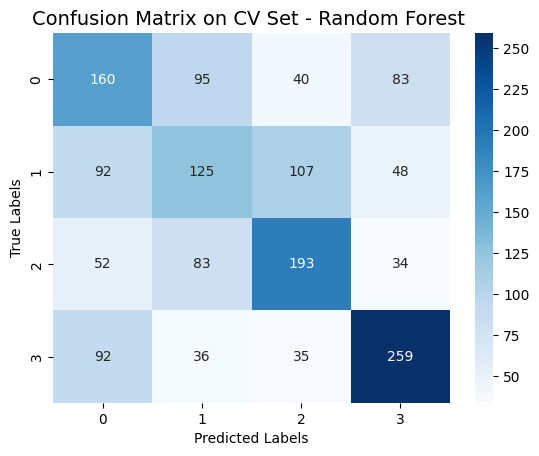

In [56]:
#Heat Map

sns.heatmap(cm, annot= True, fmt= 'd', cmap='Blues')
plt.title("Confusion Matrix on CV Set - Random Forest ", fontsize=14)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.show()

### Bagging Classifier

### import library and training

In [57]:
from sklearn.ensemble import BaggingClassifier

# Training the model

bg_clf = BaggingClassifier(estimator= DecisionTreeClassifier(), n_estimators= 50)
bg_clf.fit(x_train, y_train)

,estimator,DecisionTreeClassifier()
,n_estimators,50
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,None
,verbose,0


In [58]:
# Testing on the training set

train_pred = bg_clf.predict(x_train)
print("Training predit output:\n",train_pred)

Training predit output:
 [2 3 2 ... 0 3 3]


In [59]:
# Evaluating performance

print("\n Classification Report :\n", classification_report(y_train, train_pred))



 Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      1489
           1       0.95      0.93      0.94      1407
           2       0.93      0.96      0.95      1534
           3       0.98      0.98      0.98      1705

    accuracy                           0.96      6135
   macro avg       0.96      0.96      0.96      6135
weighted avg       0.96      0.96      0.96      6135



### Evaluating the model on the Cross-Validation set

In [60]:
#Evaluating the model on the Cross-Validation set

cv_pred = bg_clf.predict(x_cv)
print("\n-- CV predict:Bagging Classifier -- \n",cv_pred)


-- CV predict:Bagging Classifier -- 
 [3 3 0 ... 1 3 3]


In [61]:
#CV (validation) report

print("\n CV Validation Report of testdata :\n",classification_report(y_cv, cv_pred))



 CV Validation Report of testdata :
               precision    recall  f1-score   support

           0       0.43      0.42      0.43       378
           1       0.39      0.34      0.36       372
           2       0.51      0.55      0.53       362
           3       0.62      0.66      0.64       422

    accuracy                           0.50      1534
   macro avg       0.49      0.49      0.49      1534
weighted avg       0.49      0.50      0.49      1534



In [62]:
# Confusion matrix

cm = confusion_matrix(y_cv, cv_pred)
print("\n-- Confusion Matrix:Bagging Classifier -- \n",cm)


-- Confusion Matrix:Bagging Classifier -- 
 [[158  87  46  87]
 [ 81 126 114  51]
 [ 42  85 200  35]
 [ 84  26  32 280]]


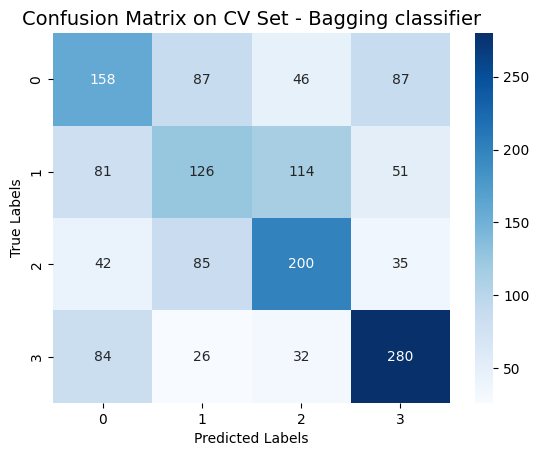

In [63]:
#Heat Map

sns.heatmap(cm, annot= True, fmt= 'd', cmap='Blues')
plt.title("Confusion Matrix on CV Set - Bagging classifier", fontsize=14)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.show()

### Check the features importance in the first tree

In [64]:
# Access the first decision tree from BaggingClassifier
dtree_fitted = bg_clf.estimators_[0]

# Get feature importance values
feature_importance = dtree_fitted.feature_importances_
feature_importance



array([0.0506981 , 0.02737815, 0.36703122, 0.03310122, 0.11865766,
       0.14585586, 0.06688934, 0.10710878, 0.08327966])

In [65]:

features = x_train.columns

features



Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Category'],
      dtype='object')

In [66]:
# Create and sort the dictionary

importance_dict = dict(zip(features, feature_importance))
sorted_importance = dict(sorted(importance_dict.items(), key=lambda item: item[1], reverse=True))
sorted_importance


{'Age': np.float64(0.3670312221942936),
 'Work_Experience': np.float64(0.14585586149862234),
 'Profession': np.float64(0.11865766453139341),
 'Family_Size': np.float64(0.10710878298518679),
 'Category': np.float64(0.08327966445067901),
 'Spending_Score': np.float64(0.06688934286292793),
 'Gender': np.float64(0.05069809526550569),
 'Graduated': np.float64(0.03310121642244319),
 'Ever_Married': np.float64(0.027378149788948113)}

In [71]:
# Display clean output

from IPython.display import display, Markdown

# Header
lines = ["--- Features Importance ---\n"]

# Add each feature on a new line
for feature, importance in sorted_importance.items():
    lines.append(f"{feature}: {importance:.4f}  ")

# Display as Markdown block
display(Markdown("\n".join(lines)))



--- Features Importance ---

Age: 0.3670  
Work_Experience: 0.1459  
Profession: 0.1187  
Family_Size: 0.1071  
Category: 0.0833  
Spending_Score: 0.0669  
Gender: 0.0507  
Graduated: 0.0331  
Ever_Married: 0.0274  

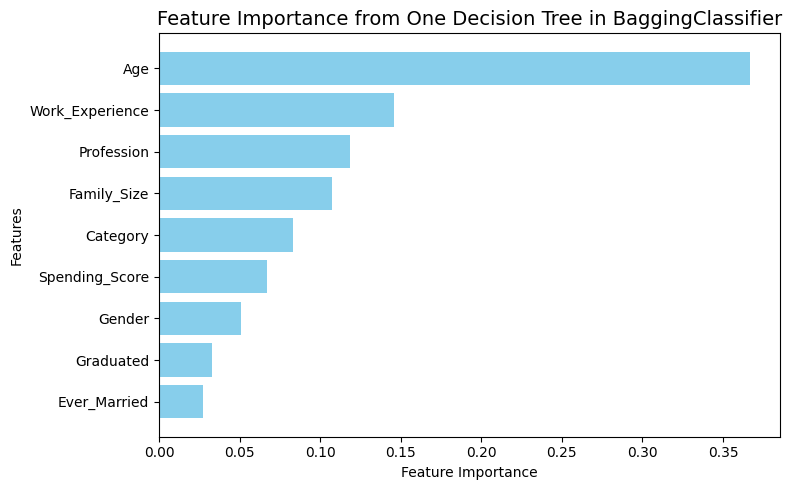

In [72]:
# Bar chart - horizontal

plt.figure(figsize=(8, 5))
plt.barh(list(sorted_importance.keys()), list(sorted_importance.values()), color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance from One Decision Tree in BaggingClassifier", fontsize=14)
plt.gca().invert_yaxis()  # Highest importance at the top
plt.tight_layout()
plt.show()

### III. Boosting

### AdaBoosting

In [73]:
from sklearn.ensemble import AdaBoostClassifier

In [74]:
# Training the model
ada_clf = AdaBoostClassifier(n_estimators=50, learning_rate= 1,  random_state=42)
ada_clf.fit(x_train, y_train)

,estimator,None
,n_estimators,50
,learning_rate,1
,algorithm,'deprecated'
,random_state,42


In [75]:
# Testing on the training set

train_pred = ada_clf.predict(x_train)
print("Training predit output:\n",train_pred)

Training predit output:
 [2 0 2 ... 2 3 2]


In [76]:
# Evaluating performance
print("\n Training Classification Report :\n", classification_report(y_train, train_pred))



 Training Classification Report :
               precision    recall  f1-score   support

           0       0.42      0.44      0.43      1489
           1       0.40      0.25      0.31      1407
           2       0.51      0.58      0.54      1534
           3       0.63      0.72      0.67      1705

    accuracy                           0.51      6135
   macro avg       0.49      0.50      0.49      6135
weighted avg       0.50      0.51      0.50      6135



### Evaluating the model on the Cross-Validation Set

In [77]:
cv_pred = ada_clf.predict(x_cv)

print("\n-- CV predict:ADA BOOSTING -- \n",cv_pred)


-- CV predict:ADA BOOSTING -- 
 [3 1 3 ... 0 3 3]


In [78]:
#CV (validation) report

print("\n CV Validation Report of testdata :\n",classification_report(y_cv, cv_pred))


 CV Validation Report of testdata :
               precision    recall  f1-score   support

           0       0.42      0.42      0.42       378
           1       0.41      0.22      0.28       372
           2       0.49      0.61      0.54       362
           3       0.64      0.77      0.70       422

    accuracy                           0.51      1534
   macro avg       0.49      0.50      0.49      1534
weighted avg       0.49      0.51      0.49      1534



In [79]:
# Confusion matrix
cm = confusion_matrix(y_cv, cv_pred)
print("\n-- Confusion Matrix:ADA BOOSTING -- \n",cm)


-- Confusion Matrix:ADA BOOSTING -- 
 [[159  49  78  92]
 [108  80 138  46]
 [ 52  45 221  44]
 [ 60  23  14 325]]


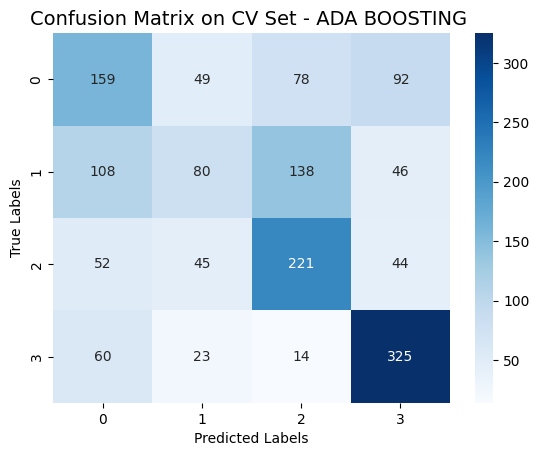

In [80]:
#Heat Map

sns.heatmap(cm, annot= True, fmt= 'd', cmap='Blues')
plt.title("Confusion Matrix on CV Set - ADA BOOSTING ", fontsize=14)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Gradient Boost

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

In [82]:
# Training the model

gb_clf = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, random_state=42)
gb_clf.fit(x_train, y_train)

,loss,'log_loss'
,learning_rate,1.0
,n_estimators,10
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [83]:
# Testing on the training set

train_pred = gb_clf.predict(x_train)
print("Training predict output:\n",train_pred)

Training predict output:
 [2 3 2 ... 0 3 3]


In [84]:
# Evaluating performance

print("\n Training Classification Report :\n", classification_report(y_train, train_pred))



 Training Classification Report :
               precision    recall  f1-score   support

           0       0.49      0.52      0.50      1489
           1       0.47      0.38      0.42      1407
           2       0.61      0.60      0.60      1534
           3       0.65      0.74      0.69      1705

    accuracy                           0.57      6135
   macro avg       0.56      0.56      0.55      6135
weighted avg       0.56      0.57      0.56      6135



In [85]:
# Evaluating the model on the Cross-Validation Set

cv_pred = gb_clf.predict(x_cv)

print("\n-- CV predict:Gradient Boosting -- \n",cv_pred)


-- CV predict:Gradient Boosting -- 
 [3 3 3 ... 0 3 3]


In [86]:
#CV (validation) report

print("\n CV Validation Report of testdata :\n",classification_report(y_cv, cv_pred))



 CV Validation Report of testdata :
               precision    recall  f1-score   support

           0       0.46      0.48      0.47       378
           1       0.43      0.31      0.36       372
           2       0.56      0.60      0.58       362
           3       0.65      0.72      0.68       422

    accuracy                           0.54      1534
   macro avg       0.52      0.53      0.52      1534
weighted avg       0.53      0.54      0.53      1534



In [87]:
# Confusion matrix

cm = confusion_matrix(y_cv, cv_pred)
print("\n-- Confusion Matrix:Gradient Boosting -- \n",cm)


-- Confusion Matrix:Gradient Boosting -- 
 [[181  69  46  82]
 [105 117 109  41]
 [ 32  67 219  44]
 [ 78  22  17 305]]


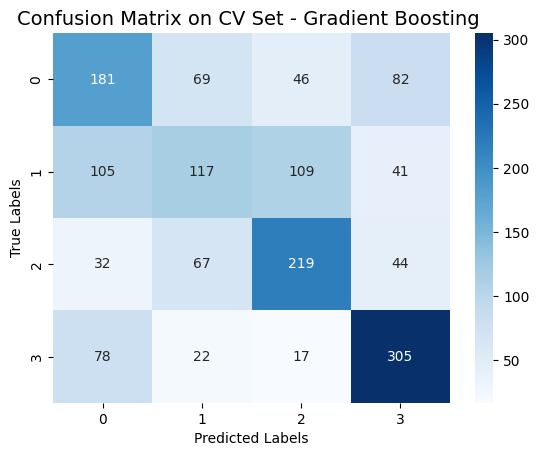

In [88]:
#Heat Map

sns.heatmap(cm, annot= True, fmt= 'd', cmap='Blues')
plt.title("Confusion Matrix on CV Set - Gradient Boosting ", fontsize=14)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### XGBoost

In [90]:
from xgboost import XGBClassifier

In [91]:
# Training the model

xgb_clf = XGBClassifier(n_estimators=100, learning_rate=.1, random_state=42)
xgb_clf.fit(x_train, y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [92]:
# Testing on the training set

train_pred = xgb_clf.predict(x_train)
print("Training predict output:\n",train_pred)

Training predict output:
 [2 3 2 ... 0 3 3]


In [93]:
# Evaluating performance

print("\n Training Classification Report :\n", classification_report(y_train, train_pred))



 Training Classification Report :
               precision    recall  f1-score   support

           0       0.64      0.62      0.63      1489
           1       0.64      0.50      0.56      1407
           2       0.68      0.71      0.70      1534
           3       0.72      0.84      0.78      1705

    accuracy                           0.68      6135
   macro avg       0.67      0.67      0.67      6135
weighted avg       0.67      0.68      0.67      6135



In [94]:
# Evaluating the model on the Cross-Validation Set

cv_pred = xgb_clf.predict(x_cv)

print("\n-- CV predict:XGBoost -- \n",cv_pred)


-- CV predict:XGBoost -- 
 [3 3 3 ... 0 3 3]


In [95]:
#CV (validation) report

print("\n CV Validation Report of testdata :\n",classification_report(y_cv, cv_pred))



 CV Validation Report of testdata :
               precision    recall  f1-score   support

           0       0.46      0.42      0.44       378
           1       0.43      0.33      0.37       372
           2       0.55      0.61      0.58       362
           3       0.62      0.75      0.68       422

    accuracy                           0.53      1534
   macro avg       0.52      0.53      0.52      1534
weighted avg       0.52      0.53      0.52      1534



In [96]:
# Confusion matrix

cm = confusion_matrix(y_cv, cv_pred)
print("\n-- Confusion Matrix: XGBoost -- \n",cm)


-- Confusion Matrix: XGBoost -- 
 [[158  78  49  93]
 [ 81 122 114  55]
 [ 36  59 220  47]
 [ 67  24  15 316]]


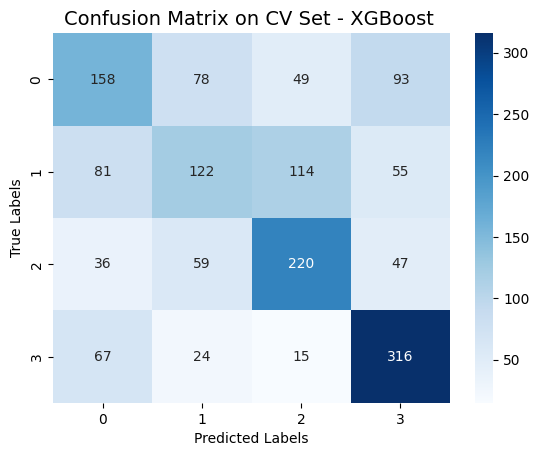

In [97]:
#Heat Map

sns.heatmap(cm, annot= True, fmt= 'd', cmap='Blues')
plt.title("Confusion Matrix on CV Set - XGBoost ", fontsize=14)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Grid Search - Hyper Parameter Tuning

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
# multi-model hyperparameter tuning

# Define Model lists

models = [
    {"name": "Decision Tree", "model": DecisionTreeClassifier(), "parameters": {"max_depth": [None, 10, 20, 30]}},
    {"name": "Random Forest", "model": RandomForestClassifier(), "parameters": {"n_estimators": [10, 50, 100]}},
    {"name": "Bagging Classifier", "model": BaggingClassifier(), "parameters": {"n_estimators": [10, 50, 100]}},
    {"name": "AdaBoost", "model": AdaBoostClassifier(), "parameters": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 1]}},
    {"name": "Gradient Boosting", "model": GradientBoostingClassifier(), "parameters": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 1]}},
    {"name": "XGBoost", "model": XGBClassifier(), "parameters": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 1]}}
]

In [100]:
#  Run GridSearchCV for Each Model

for entry in models:
    print(f"\n--- Grid Search: {entry['name']} ---")

    grid = GridSearchCV(estimator=entry['model'],
                        param_grid=entry['parameters'],
                        cv=5,
                        scoring='accuracy',
                        n_jobs=-1)

    grid.fit(x_train, y_train)

    print("Best Parameters:", grid.best_params_)
    print(f"Best CV Score: {grid.best_score_:.4f}")




--- Grid Search: Decision Tree ---
Best Parameters: {'max_depth': 10}
Best CV Score: 0.4820

--- Grid Search: Random Forest ---
Best Parameters: {'n_estimators': 100}
Best CV Score: 0.4826

--- Grid Search: Bagging Classifier ---
Best Parameters: {'n_estimators': 100}
Best CV Score: 0.4781

--- Grid Search: AdaBoost ---
Best Parameters: {'learning_rate': 1, 'n_estimators': 100}
Best CV Score: 0.5104

--- Grid Search: Gradient Boosting ---
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Best CV Score: 0.5314

--- Grid Search: XGBoost ---
Best Parameters: {'learning_rate': 0.01, 'n_estimators': 100}
Best CV Score: 0.5275


In [102]:
# SCATTER PLOT FOR GRID SEARCH

# Function to plot grid search results

def plot_grid_search(cv_results, param_name, model_name):
    plt.title(f"Grid Search Scores for {model_name}", fontsize=16)
    plt.xlabel(param_name, fontsize=14)
    plt.ylabel("Mean Test Score", fontsize=14)
    plt.grid()

    param_values = cv_results['param_' + param_name].data
    mean_test_scores = cv_results['mean_test_score']

    plt.scatter(param_values, mean_test_scores, marker='o')

In [113]:
# Initialize Dictionary - to store the best parameters

best_models = {} 

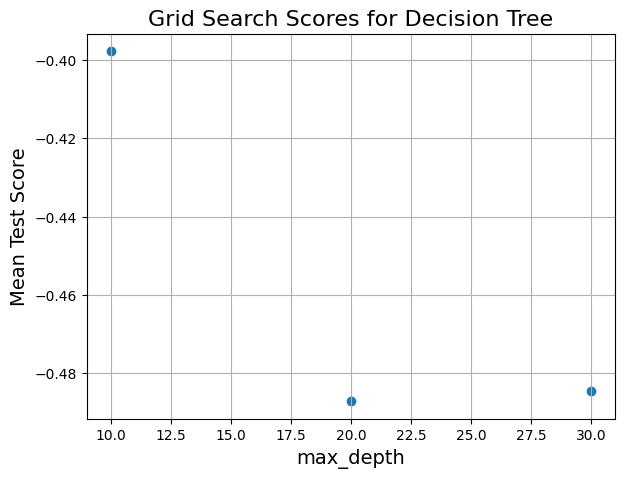

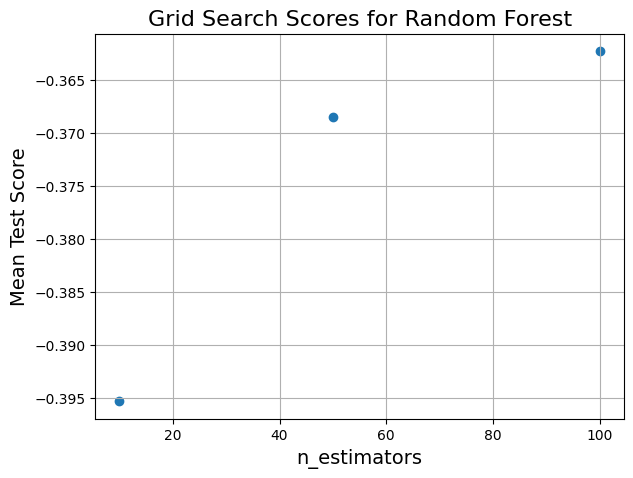

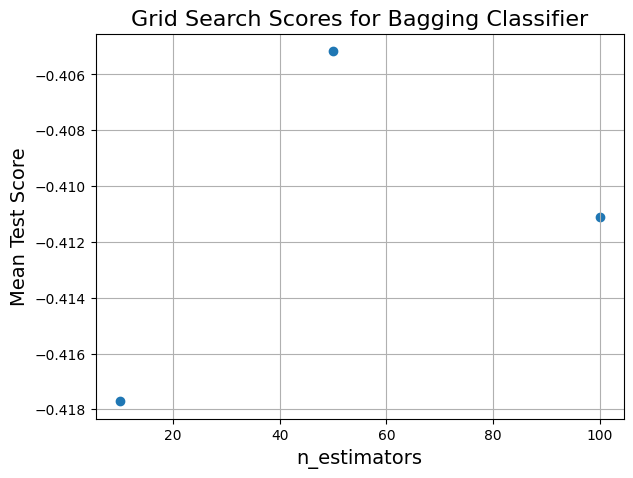

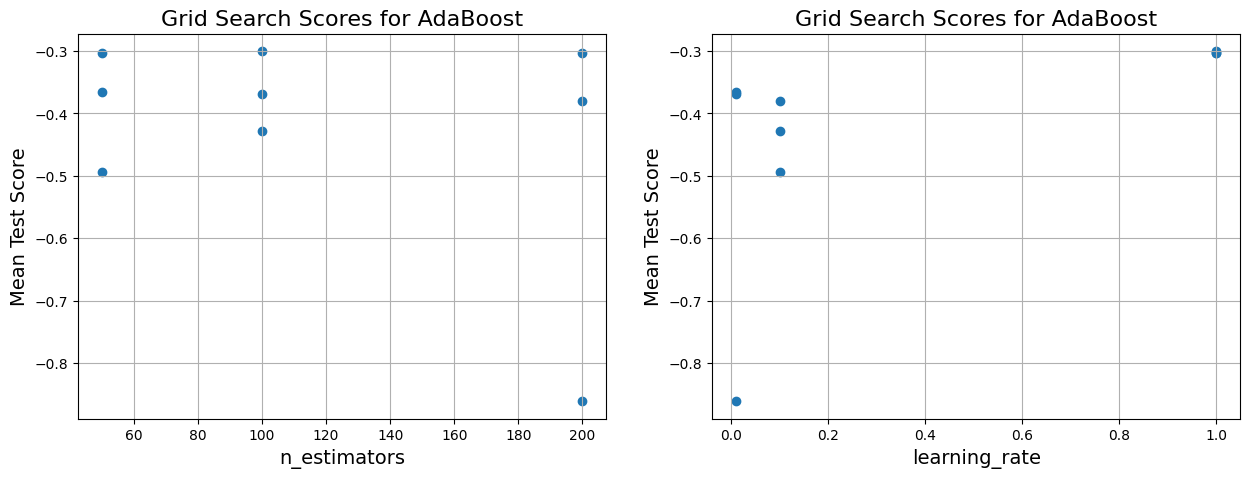

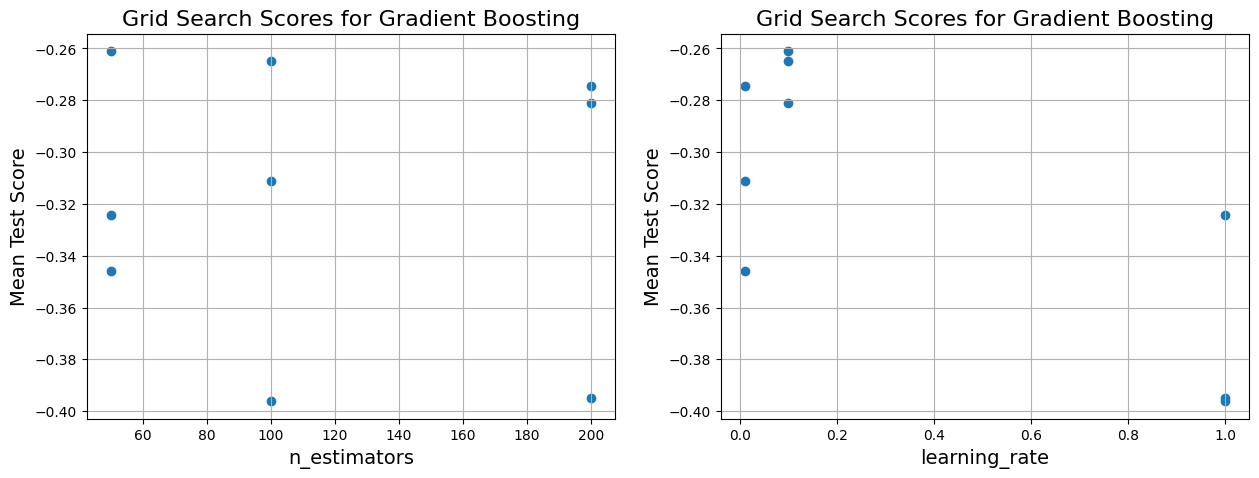

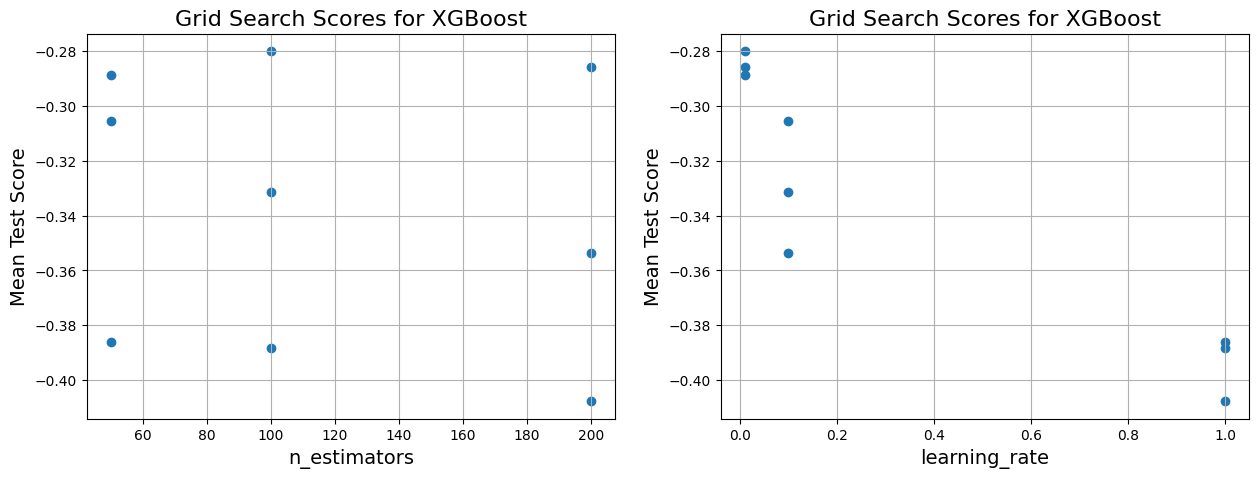

In [119]:

# Loop Through Models and Perform grid search and plot results for each model

for model_info in models:
    model_name = model_info["name"]
    model = model_info["model"]
    param_grid = model_info["parameters"]

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(x_train, y_train)

    plt.figure(figsize=(15, 5))
    idx = 0
    for param_name in param_grid.keys():
        plt.subplot(1, 2, idx % 2 + 1)
        plot_grid_search(grid_search.cv_results_, param_name, model_name)
        idx += 1

    plt.show()

    # Save Best Parameters

    best_models[model_name] = grid_search.best_params_

In [120]:

print("\n--- Final Best Parameters for All Models ---")
best_models


--- Final Best Parameters for All Models ---


{'XGBoost': {'learning_rate': 0.01, 'n_estimators': 100},
 'Decision Tree': {'max_depth': 10},
 'Random Forest': {'n_estimators': 100},
 'Bagging Classifier': {'n_estimators': 50},
 'AdaBoost': {'learning_rate': 1, 'n_estimators': 100},
 'Gradient Boosting': {'learning_rate': 0.1, 'n_estimators': 50}}

## Evaluation on the test dataset

### Pre-Processing

In [121]:
# Encode the Categorical Columns in the Test Data
lbld_test = df_test.copy()
for col in cat_cols:
    lbld_test[col] = le[col].transform(df_test[col])

# Scaling the Numeric Columns
lbld_test[numeric_columns] = scaler.transform(df_test[numeric_columns])

lbld_test.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category,Segmentation
0,0,1,-0.453964,1,2,-0.758543,2,-1.248242,5,1
1,1,1,-0.394282,1,5,1.698998,0,0.762074,5,0
3,1,1,0.918726,0,4,2.620575,1,-0.578137,5,1
4,0,0,-1.468561,0,8,-0.451350,2,0.762074,5,0
5,1,1,0.202540,1,1,-0.758543,1,1.432180,3,2


In [122]:
# Separate features and target from the labeled test set

x_eval = lbld_test.drop('Segmentation', axis= 1)
y_eval = lbld_test['Segmentation']

## Getting the Results of Best Models

In [124]:
# model registry: a list of dictionaries with name,model,parameter

models = [
    {"name": "Decision Tree", "model": DecisionTreeClassifier, "parameters": {"max_depth": [None, 10, 20, 30]}},
    {"name": "Random Forest", "model": RandomForestClassifier, "parameters": {"n_estimators": [10, 50, 100]}},
    {"name": "Bagging Classifier", "model": BaggingClassifier, "parameters": {"n_estimators": [10, 50, 100]}},
    {"name": "AdaBoost", "model": AdaBoostClassifier, "parameters": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 1]}},
    {"name": "Gradient Boosting", "model": GradientBoostingClassifier, "parameters": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 1]}},
    {"name": "XGBoost", "model": XGBClassifier, "parameters": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 1]}}
]

In [125]:
#Loop Through Models and Evaluate

for model_info in models:
    params = best_models[model_info['name']]
    model = model_info['model'](**params)
    
    model.fit(x_train, y_train)  # train on trainong data
    y_pred = model.predict(x_eval) # Evaluate on testdata
    
    print(f"Model: #----{model_info['name']}----#")
    print(classification_report(y_eval, y_pred))

Model: #----Decision Tree----#
              precision    recall  f1-score   support

           0       0.35      0.23      0.27       794
           1       0.27      0.31      0.29       523
           2       0.25      0.35      0.29       445
           3       0.43      0.44      0.43       726

    accuracy                           0.33      2488
   macro avg       0.32      0.33      0.32      2488
weighted avg       0.34      0.33      0.33      2488

Model: #----Random Forest----#
              precision    recall  f1-score   support

           0       0.34      0.24      0.28       794
           1       0.24      0.26      0.25       523
           2       0.25      0.35      0.29       445
           3       0.43      0.44      0.43       726

    accuracy                           0.32      2488
   macro avg       0.31      0.32      0.31      2488
weighted avg       0.33      0.32      0.32      2488

Model: #----Bagging Classifier----#
              precision    recal

## Model Performance Summary and Best Overall Model

In [139]:
#Imports & Setup

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import joblib

# Candidate model classes
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

%matplotlib inline


In [140]:
#Model Dictionary & Initialization

# Dictionary mapping model names to their classes
model_classes = {
    "Decision Tree": DecisionTreeClassifier,
    "Random Forest": RandomForestClassifier,
    "Bagging Classifier": BaggingClassifier,
    "AdaBoost": AdaBoostClassifier,
    "Gradient Boosting": GradientBoostingClassifier,
    "XGBoost": XGBClassifier
}

results = []
best_models = {}


In [ ]:
# Grid Search Loop

In [142]:
# Evaluate all models and capture metrics
for model_info in models:
    model_name = model_info["name"]
    model_class = model_info["model"]      # class reference
    model = model_class()                  # instantiate
    param_grid = model_info["parameters"]

    print(f"Running GridSearch for {model_name}...")  # progress marker

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(x_train, y_train)

    # Get classification report as dictionary
    y_pred = grid_search.predict(x_eval)
    report = classification_report(y_eval, y_pred, output_dict=True)

    # Extract metrics dynamically
    results.append({
        "Model": model_name,
        "Accuracy": report['accuracy'],
        "Weighted F1": report['weighted avg']['f1-score'],
        "Macro F1": report['macro avg']['f1-score'],
        "Class 3 F1": report['3']['f1-score']  # assumes class label "3"
    })

    # Save best parameters for this model
    best_models[model_name] = grid_search.best_params_
    
    print(f"Finished {model_name}, best params: {grid_search.best_params_}\n")

Running GridSearch for Decision Tree...
Finished Decision Tree, best params: {'max_depth': 10}

Running GridSearch for Random Forest...
Finished Random Forest, best params: {'n_estimators': 100}

Running GridSearch for Bagging Classifier...
Finished Bagging Classifier, best params: {'n_estimators': 50}

Running GridSearch for AdaBoost...
Finished AdaBoost, best params: {'learning_rate': 1, 'n_estimators': 100}

Running GridSearch for Gradient Boosting...
Finished Gradient Boosting, best params: {'learning_rate': 0.1, 'n_estimators': 50}

Running GridSearch for XGBoost...
Finished XGBoost, best params: {'learning_rate': 0.01, 'n_estimators': 100}



In [144]:
#Results & Best Model Selection (with print BEFORE chart)

# Create DataFrame
df_results = pd.DataFrame(results)
print("\n--- Model Performance Summary ---\n")
print(df_results.to_string(index=False))

# Compute overall score
metrics = ["Accuracy", "Weighted F1", "Macro F1", "Class 3 F1"]
df_results["Score"] = df_results[metrics].sum(axis=1)

# Identify best model dynamically
best_row = df_results.loc[df_results["Score"].idxmax()]
best_model_name = best_row["Model"]
best_params = best_models[best_model_name]

BestModelClass = model_classes[best_model_name]
best_model = BestModelClass(**best_params)
best_model.fit(x_train, y_train)
joblib.dump(best_model, "../final_project_jupyter/best_model.pkl")

# Print best model summary BEFORE plotting
reason = (
    f"{best_model_name} is chosen because it achieves the highest overall score "
    f"across Accuracy ({best_row['Accuracy']:.2f}), Weighted F1 ({best_row['Weighted F1']:.2f}), "
    f"Macro F1 ({best_row['Macro F1']:.2f}), and Class 3 F1 ({best_row['Class 3 F1']:.2f})."
)
print(f"\n🏆 Best Overall Model: {best_model_name}\n")
print(f"Reason: {reason}")



--- Model Performance Summary ---

             Model  Accuracy  Weighted F1  Macro F1  Class 3 F1
     Decision Tree  0.326367     0.324841  0.320368    0.430811
     Random Forest  0.314309     0.313917  0.306607    0.422478
Bagging Classifier  0.315113     0.316627  0.308209    0.415621
          AdaBoost  0.325965     0.324431  0.312210    0.450890
 Gradient Boosting  0.334003     0.331903  0.321951    0.445170
           XGBoost  0.329984     0.325001  0.315901    0.444304
     Decision Tree  0.327170     0.325813  0.321000    0.431880
     Random Forest  0.319132     0.318196  0.311332    0.425017
Bagging Classifier  0.316318     0.317466  0.309057    0.416265
          AdaBoost  0.325965     0.324431  0.312210    0.450890
 Gradient Boosting  0.334003     0.331903  0.321951    0.445170
           XGBoost  0.329984     0.325001  0.315901    0.444304

🏆 Best Overall Model: Gradient Boosting

Reason: Gradient Boosting is chosen because it achieves the highest overall score across A

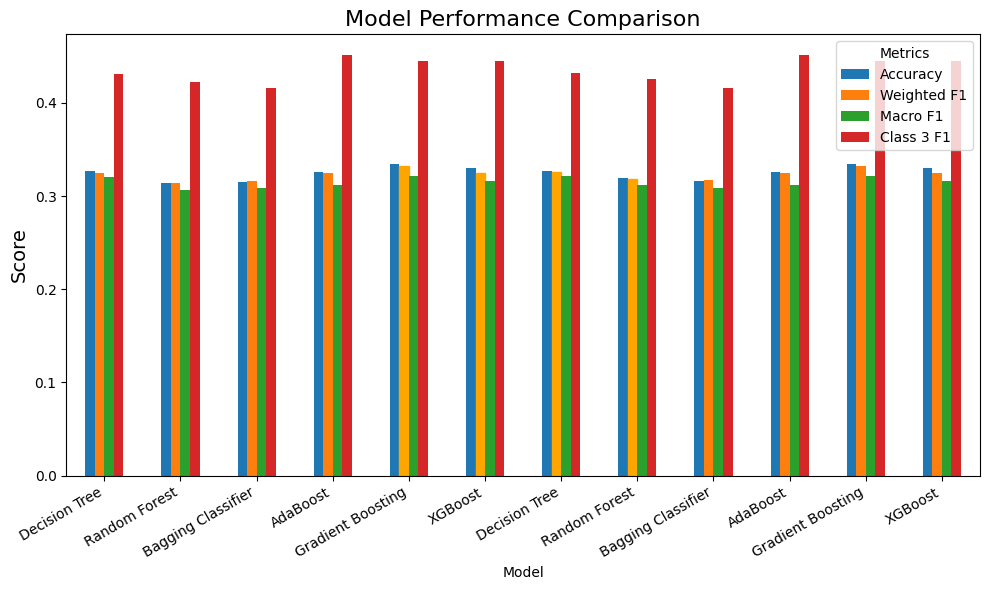

In [145]:
# Plotting

fig, ax = plt.subplots(figsize=(10,6))
df_results.set_index("Model")[metrics].plot(kind="bar", ax=ax)

# Highlight best model bars in orange
bars = ax.patches
model_names = df_results["Model"].tolist()
highlight_index = model_names.index(best_model_name)

for i in range(len(metrics)):
    bars[highlight_index*len(metrics) + i].set_color("orange")

plt.title("Model Performance Comparison", fontsize=16)
plt.ylabel("Score", fontsize=14)
plt.xticks(rotation=30, ha="right")
plt.legend(title="Metrics")
plt.tight_layout()
plt.show()


### Final Report

***After evaluating multiple models (Decision Tree, Random Forest, Bagging, AdaBoost, Gradient Boosting, XGBoost), my analysis showed that,***
- Best Overall Model: Gradient Boosting
- It achieved the highest accuracy and balanced F1 scores across all customer groups.
- Performance was especially strong for the critical customer segment (Class 3), reducing misclassification risk


### Conclusion ###

Based on our analysis,***Gradient Boosting is the most effective model for predicting the right group of new customers***.

It delivers the highest accuracy and balanced performance across all customer segments, ensuring reliable classification.

This model will be deployed to support managers in making data‑driven decisions about customer targeting and engagement, ultimately improving business outcomes.